# Project Goal
---

> **다음 분기에 어떤 게임을 설계해야 할까?**

>  연도별 트렌드, 장르, 플랫폼, 시장



# Preliminary EDA
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

files.upload()

**Data Description**


*   Data Source : https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

*   Name : 게임의 이름입니다.
*   Platform : 게임이 지원되는 플랫폼의 이름입니다.
*   Year : 게임이 출시된 연도입니다.
*   Genre : 게임의 장르입니다.
*   Publisher : 게임을 제작한 회사입니다.
*   NA_Sales : 북미지역에서의 출고량입니다.
*   EU_Sales : 유럽지역에서의 출고량입니다.
*   JP_Sales : 일본지역에서의 출고량입니다.
*   Other_Sales : 기타지역에서의 출고량입니다.






In [3]:
df = pd.read_csv('vgames2.csv')
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


**데이터 정제**

*   Year, Genre, Publisher Column에 결측치 존재.
*   Some zeros must exist in Year column.
*   열: 16598의 데이터
*   Sales columns are object.

*   Sales column 내 K(1,000),M(1,000,000)으로 표시.





In [4]:
df.info() #Year,Genre,Publisher에 결측치 존재.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
df.describe() #Minimun is 0. Some zeros must exist in Year column

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [6]:
df.shape #(16598, 9)

(16598, 9)

In [7]:
df.dtypes #Sales columns are object.

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

**파악한 데이터 문제 처리**


*   판매랑 : K -> 1,000 / M -> 1,000,000
*   전세계 판매량 새 Feature 추가
*   연도 Null값을 0으로 대체
*   중복 데이터 확인 및 삭제
*   2자리로 나타난 연도 이상치 처리
*   연도/장르/개발사 결측치 확인 및 웹 크롤링을 통해 데이터 filled


In [9]:
#Replace k with 1,000, m with 1,000,000
sales = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
for i in sales:
  df[i] = np.round(df[i].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(float),decimals=2)
df['Global_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [10]:
df.dtypes #Sales columns are now float

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [11]:
df['Year'] = df['Year'].fillna(0) 
df['Year'] = df['Year'].astype(int)

In [12]:
#2 sets of identical rows.
identical1 = df.loc[:,'Name':'Year'].duplicated(keep=False)
df[identical1]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7346,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
8055,Wii de Asobu: Metroid Prime,Wii,0,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02
8717,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01
9184,Wii de Asobu: Metroid Prime,Wii,0,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


In [13]:
identical2 = df.loc[:,'Name':'Year'].duplicated()
df.drop(df[identical2].index,inplace=True)
df[identical1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7346,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
8055,Wii de Asobu: Metroid Prime,Wii,0,Shooter,Nintendo,0.00,0.00,0.02,0.00,0.02


In [14]:
under_1900 = df.query('Year <=1900')
under_1900 = under_1900[under_1900['Year'] != 0] #Except rows with 0 year value.
under_1900.sort_values(by='Global_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4010,Uncharted 4: A Thief's End,PS4,16,Shooter,Sony Computer Entertainment,1300000.00,2.07,0.18,0.65,1300002.90
10357,The Humans: Meet the Ancestors!,DS,9,Puzzle,Deep Silver,10000.00,0.00,0.00,0.00,10000.00
10621,Pokemon Black/Pokemon White,DS,10,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
11519,The Elder Scrolls V: Skyrim,X360,11,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
1220,Ratchet & Clank: Going Commando,PS2,3,Platform,Sony Computer Entertainment,1.44,0.83,0.26,0.25,2.78
...,...,...,...,...,...,...,...,...,...,...
6192,Azure Striker Gunvolt: Striker Pack,3DS,16,Action,Inti Creates,0.00,0.00,0.01,0.00,0.01
9080,Monster Trux Offroad,Wii,7,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
7555,Professional Farmer 2016,PSV,15,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01
16103,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00,0.01


In [15]:
df[df.loc[:,'Name'] == 'Professional Farmer 2016']
#xx = 20xx

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7555,Professional Farmer 2016,PSV,15,Action,Namco Bandai Games,0.0,0.01,0.0,0.0,0.01
13495,Professional Farmer 2016,PS4,2015,Action,Namco Bandai Games,0.0,0.01,0.0,0.0,0.01


In [ ]:
under_1900['Year'] += 2000
under_1900.sort_values(by='Global_Sales', ascending=False)

In [17]:
df.update(under_1900['Year']) #Update Year column data to original df.

In [ ]:
zero_year = df.query('Year == 0')
zero_year.sort_values(by='Global_Sales',ascending=False) #273 rows detected

In [19]:
#결측치 확인
null_rows = df[df['Year']==0 | df['Genre'].isnull() | df['Publisher'].isnull()]
null_rows.sort_values(by='Global_Sales',ascending=False,inplace=True)
null_rows[null_rows['Global_Sales'] >=3] #Worth filling in missing data manually.

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10301,Madden NFL 07,PSP,0.0,Sports,Unknown,770000.00,0.03,0.00,0.04,770000.07
4617,Hangman,2600,0.0,Puzzle,Atari,350000.00,0.02,0.00,0.00,350000.02
3832,Pac-Man Fever,GC,0.0,Misc,Unknown,210000.00,0.06,0.00,0.01,210000.07
12417,Silent Hill: Homecoming,PS3,0.0,Action,Konami Digital Entertainment,180000.00,0.15,0.00,0.06,180000.21
2552,The Golden Compass,PSP,0.0,Action,Sega,0.11,160000.00,0.00,0.10,160000.21
12536,The Chronicles of Riddick: Escape from Butcher...,XB,0.0,Shooter,Vivendi Games,0.32,110000.00,0.00,0.02,110000.34
16278,Madden NFL 11,Wii,0.0,Sports,Unknown,0.70,0.00,0.00,50000.00,50000.70
15216,Haven: Call of the King,PS2,0.0,Platform,Midway Games,0.14,0.11,0.00,40000.00,40000.25
14292,Tom Clancy's Rainbow Six: Critical Hour,XB,0.0,Shooter,Unknown,40000.00,0.01,0.00,0.00,40000.01
6779,Shrek the Third,DS,0.0,Action,Activision,0.26,20000.00,0.00,0.02,20000.28


In [20]:
df['Genre'] = df['Genre'].astype(str)
df.loc[df.Name == 'Pokemon X/Pokemon Y', 'Genre'] = 'Role-Playing'
df.loc[df.Name == 'Madden NFL 07', 'Year'] = 2006
df.loc[df.Name == 'Hangman', 'Year'] = 1978
df.loc[df.Name == 'James Bond 007: Nightfire', 'Genre'] = 'Shooter'
df.loc[df.Name == 'Pac-Man Fever', 'Year'] = 2002
df.loc[df.Name == 'Silent Hill: Homecoming', 'Year'] = 2008
df.loc[df.Name == 'The Golden Compass', 'Year'] = 2007
df.loc[df.Name == 'The Chronicles of Riddick: Escape from Butcher Bay', 'Year'] = 2004
df.loc[df.Name == 'Madden NFL 11', 'Year'] = 2010
df.loc[df.Name == 'Haven: Call of the King', 'Year'] = 2002
df.loc[df.Name == "Tom Clancy's Rainbow Six: Critical Hour", 'Year'] = 2006
df.loc[df.Name == 'Shrek the Third', 'Year'] = 2007
df.loc[df.Name == 'Saint', 'Year'] = 2009
df.loc[df.Name == 'Madden NFL 2004', 'Year'] = 2003
df.loc[df.Name == 'FIFA Soccer 2004', 'Year'] = 2003
df.loc[df.Name == 'LEGO Batman: The Videogame', 'Year'] = 2008

In [21]:
df.drop(null_rows[null_rows['Global_Sales'] < 3].index,inplace=True)

In [22]:
over_2021 = df.query('Year >=2021')
over_2021.sort_values(by='Global_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4365,Adventure Island,NES,2086.0,Platform,Hudson Soft,0.00,0.00,1.05,0.00,1.05
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,2096.0,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00,0.90
3492,Glover,N64,2098.0,Platform,Hasbro Interactive,0.72,0.17,0.00,0.01,0.90
2429,Casper,PS,2096.0,Adventure,Interplay,0.46,0.31,0.00,0.05,0.82
4807,Virtua Cop,SAT,2095.0,Shooter,Sega,0.00,0.00,0.62,0.00,0.62
16482,Super Robot Taisen F Kanketsuhen,SAT,2098.0,Strategy,Banpresto,0.00,0.00,0.55,0.00,0.55
4839,Mobile Suit Gundam,PS,2095.0,Action,Namco Bandai Games,0.00,0.00,0.42,0.03,0.45
11334,Super Fire ProWrestling X,SNES,2095.0,Fighting,Human Entertainment,0.00,0.00,0.28,0.00,0.28
10315,AeroFighters Assault,N64,2097.0,Action,Video System,0.15,0.04,0.00,0.00,0.19
81,Treasures of the Deep,PS,2097.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18


In [23]:
df[df.loc[:,'Name'] == 'Mobile Suit Gundam']
#20xx -> 19xx

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4839,Mobile Suit Gundam,PS,2095.0,Action,Namco Bandai Games,0.0,0.0,0.42,0.03,0.45
14964,Mobile Suit Gundam,SAT,1995.0,Action,Namco Bandai Games,0.0,0.0,0.41,0.00,0.41


In [24]:
over_2021['Year'] -= 100
df.update(over_2021['Year']) #Update Year column data to original df.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df[df.loc[:,'Name'] == 'S.C.A.R.S'] #Correctly updated.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1241,S.C.A.R.S,N64,1998.0,Racing,Ubisoft,0.05,0.01,0.0,0.00,0.06
14572,S.C.A.R.S,PS,1998.0,Racing,Ubisoft,0.05,0.03,0.0,0.01,0.09


In [26]:
df.isnull().sum() #58 null rows with Publisher data

Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [27]:
null_pub = df[df['Publisher'].isnull()]
null_pub[null_pub['Global_Sales']>3] #All of publihser data lacking rows are negligible.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [28]:
df.drop(null_pub.index,inplace=True)

In [29]:
nan_pub = df[df['Genre']=='nan']
nan_pub[nan_pub['Global_Sales']>3] #2 of them are worth updating.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4598,Wii Party,Wii,2010.0,nan,Nintendo,1.79,3.53,2.49,0.68,8.49
9488,Final Fantasy XII,PS2,2006.0,nan,Square Enix,1.88,0.00,2.33,1.74,5.95


In [30]:
df.loc[df.Name == 'Wii Party', 'Genre'] = 'Misc'
df.loc[df.Name == 'Final Fantasy XII', 'Genre'] = 'Role-Playing'
df.drop(nan_pub[nan_pub['Global_Sales'] < 3].index,inplace=True)

In [31]:
df.isnull().sum() #All null data removed.

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [32]:
df['Year'] = df['Year'].astype(int)

**연도별 데이터 수 확인**
*   1978,1989,2017,2020 4개년도는 총 13개의 적은 데이터 갯수.
*   데이터 분석의 일관성을 위해 제거.

In [33]:
df.groupby('Year')['Name'].count() #1978,1989,2017,2020 have small set of data.

Year
1978       1
1980       8
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     262
1997     289
1998     377
1999     336
2000     345
2001     479
2002     830
2003     776
2004     741
2005     934
2006    1008
2007    1197
2008    1425
2009    1429
2010    1255
2011    1133
2012     651
2013     546
2014     580
2015     611
2016     342
2017       3
2020       1
Name: Name, dtype: int64

In [34]:
small_yrs = [1978,1980, 2017, 2020]
df.drop(df[df['Year'].isin(small_yrs)].index,inplace=True)



*   전세계 판매량을 기준으로 'Rank'라는 새로운 feature 추가.



In [35]:
df.sort_values(by='Global_Sales', ascending=False,inplace=True)
df.reset_index(inplace=True,drop=True)
df['Rank'] = df.index+1

#Rank Column to the front
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

In [ ]:
df.tail()

In [36]:
df.shape #(16242, 11)

(16242, 11)

In [37]:
df.describe() #

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16242.000000,16242.000000,1.624200e+04,1.624200e+04,1.624200e+04,16242.000000,1.624200e+04
mean,8121.500000,2006.417683,4.986100e+03,2.145202e+03,1.228990e+03,463.045241,8.823337e+03
std,4688.805871,5.799635,1.294027e+05,5.307957e+04,4.514661e+04,10258.398890,1.473875e+05
min,1.000000,1981.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4061.250000,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.000000e-02
50%,8121.500000,2007.000000,8.000000e-02,2.000000e-02,0.000000e+00,0.010000,1.800000e-01
75%,12181.750000,2010.000000,2.500000e-01,1.200000e-01,4.000000e-02,0.040000,5.200000e-01
max,16242.000000,2016.000000,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000,9.630007e+06


---
# 지역별 선호 게임 장르
> **Q. 지역에 따라서 선호하는 게임 장르가 다를까?**
---

In [ ]:
genre_sales = df.loc[:,['Genre','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].groupby(by='Genre',as_index=False).sum()
genre_sales

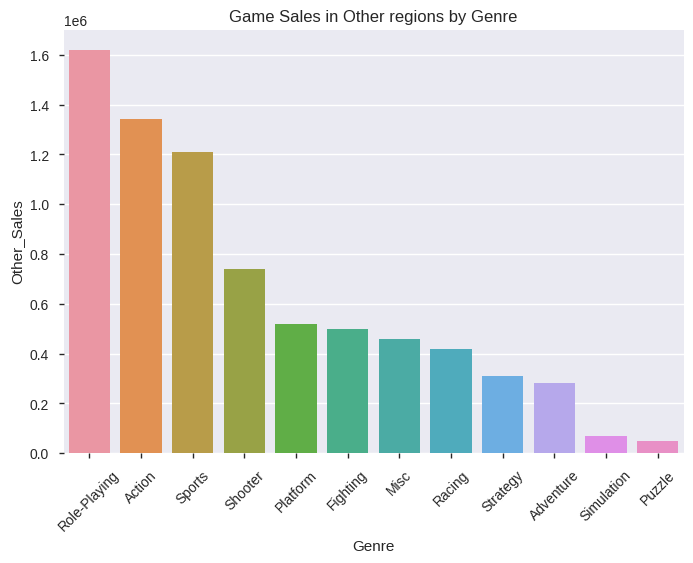

In [ ]:
genre_sales.sort_values(by='Other_Sales', ascending=False,inplace=True)
ax = sns.barplot(data=genre_sales, x='Genre', y='Other_Sales').set(title='Game Sales in Other regions by Genre');
plt.xticks(rotation=45);

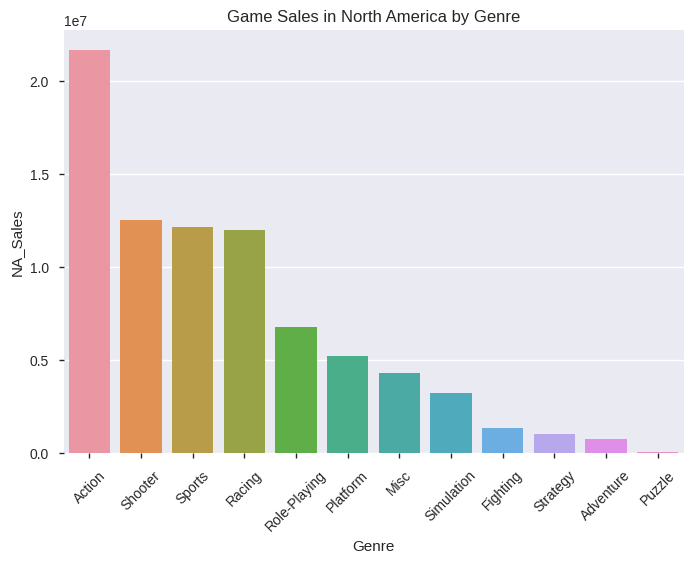

In [ ]:
genre_sales.sort_values(by='NA_Sales', ascending=False,inplace=True)
ax = sns.barplot(data=genre_sales, x='Genre', y='NA_Sales').set(title='Game Sales in North America by Genre');
plt.xticks(rotation=45);

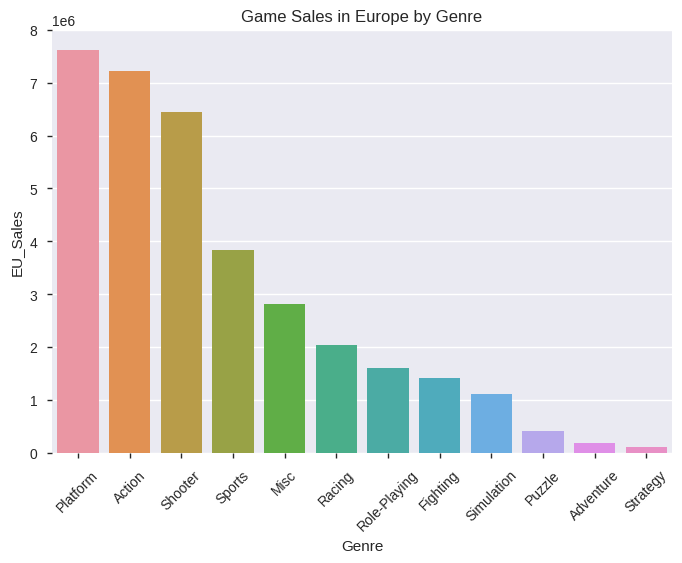

In [ ]:
genre_sales.sort_values(by='EU_Sales', ascending=False,inplace=True)
ax = sns.barplot(data=genre_sales, x='Genre', y='EU_Sales').set(title='Game Sales in Europe by Genre');
plt.xticks(rotation=45);

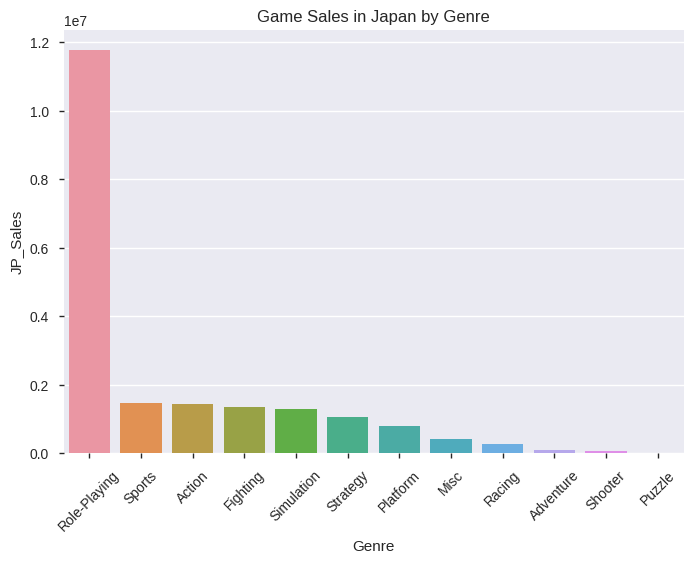

In [ ]:
genre_sales.sort_values(by='JP_Sales', ascending=False,inplace=True)
ax = sns.barplot(data=genre_sales, x='Genre', y='JP_Sales').set(title='Game Sales in Japan by Genre');
plt.xticks(rotation=45);

---
# 연도별 게임의 트렌드
> **Q. 연도별 게임의 트렌드가 있을까?**
> 1. 연도별 총 시장 크기
> 2. 연도별 지역별 글로벌 시장 비율
> 3. 플랫폼
> 4. 장르
---

In [38]:
data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()

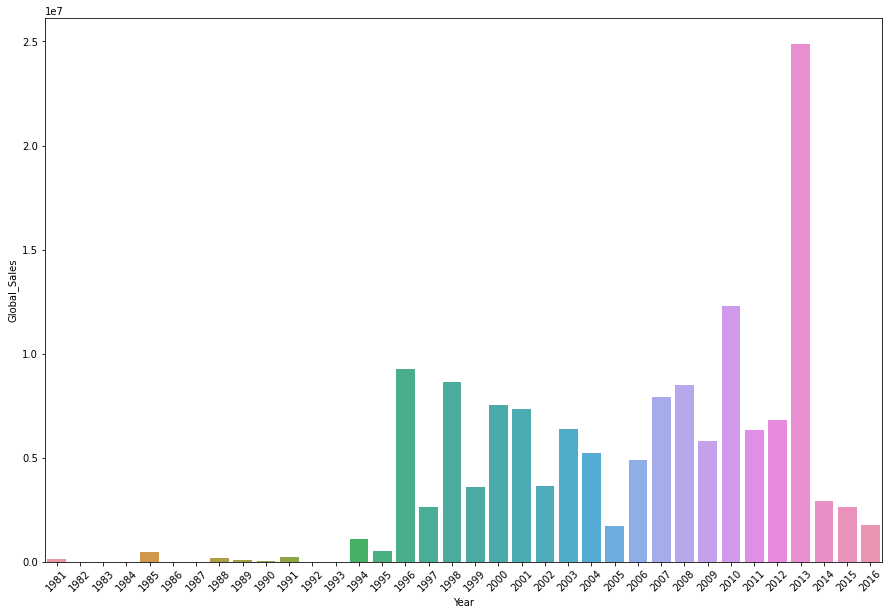

In [39]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year);
plt.xticks(rotation=45);

In [40]:
#Yearly market share by region
df2 = df.loc[:,['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].groupby('Year').sum()

In [42]:
from sklearn.preprocessing import MinMaxScaler

cols = df2.T.columns 
index = df2.T.index

mm_scaler = MinMaxScaler()
x_scaled = mm_scaler.fit_transform(df2.T)
df2_scaled = pd.DataFrame(x_scaled)
df2_scaled.set_index(keys=index, inplace=True)
df2_scaled.set_axis(axis=1, labels = cols, inplace=True)
df2_scaled

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
NA_Sales,0.000304,0.932133,0.457383,0.656193,0.999956,0.300711,0.384186,0.000091,0.999529,0.000890,...,0.789989,0.539872,0.277315,0.683877,0.450157,0.426446,0.768347,0.125019,0.533843,0.947648
EU_Sales,0.999694,0.057133,0.039616,0.028197,0.000008,0.025889,0.056279,0.000000,0.000116,0.000000,...,0.161333,0.182823,0.594414,0.030657,0.445323,0.444270,0.157424,0.798558,0.103602,0.005821
JP_Sales,0.000000,0.000000,0.477791,0.273313,0.000030,0.508677,0.531628,0.000048,0.000281,0.000362,...,0.000000,0.000000,0.000000,0.056915,0.000000,0.089151,0.000000,0.045134,0.000000,0.000000
Other_Sales,0.000003,0.010734,0.000000,0.000000,0.000000,0.000000,0.000000,0.999757,0.000000,0.997606,...,0.006404,0.152138,0.102245,0.000000,0.056266,0.000000,0.030179,0.000000,0.219102,0.011624
Global_Sales,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


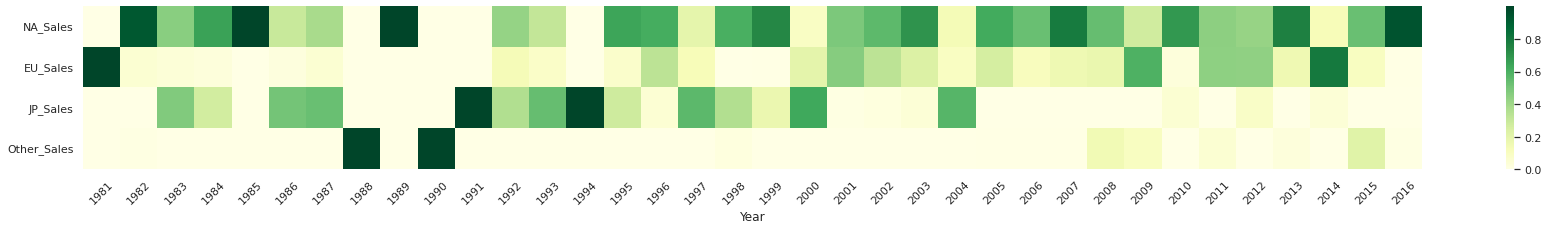

In [43]:
sns.set(rc = {'figure.figsize':(30,3)})
sns.heatmap(df2_scaled.loc['NA_Sales':'Other_Sales'],cmap="YlGn");
plt.xticks(rotation = 45);

In [44]:
ct_df = pd.crosstab(index = df['Year'], columns = df['Genre'])

In [45]:
#Sum column for yearly total numbers of games.
ct_df['Sum'] = len(ct_df.index) * [0]
for i in ct_df.index:
  ct_df.loc[i]['Sum'] = ct_df.loc[i,'Action':'Strategy'].sum()

In [46]:
from sklearn.preprocessing import MinMaxScaler

cols = ct_df.T.columns 
index = ct_df.T.index

mm_scaler = MinMaxScaler()
x_scaled = mm_scaler.fit_transform(ct_df.T)
ct_df_scaled = pd.DataFrame(x_scaled)
ct_df_scaled.set_index(keys=index, inplace=True)
ct_df_scaled.set_axis(axis=1, labels = cols, inplace=True)
ct_df_scaled

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.543478,0.500000,0.411765,0.071429,0.142857,0.285714,0.1250,0.133333,0.117647,0.1875,...,0.147186,0.124364,0.173448,0.159314,0.184307,0.393750,0.267035,0.312391,0.408264,0.345029
Adventure,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.0000,...,0.036364,0.084364,0.080657,0.099673,0.063869,0.071875,0.104972,0.118674,0.077686,0.096491
Fighting,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.1250,0.000000,0.000000,0.0000,...,0.006926,0.005091,0.017844,0.007353,0.010949,0.028125,0.031308,0.027923,0.024793,0.040936
Misc,0.000000,0.027778,0.058824,0.071429,0.000000,0.000000,0.0000,0.000000,0.058824,0.0000,...,0.093506,0.116364,0.127766,0.138889,0.133212,0.042188,0.071823,0.059337,0.054545,0.052632
Platform,0.065217,0.138889,0.294118,0.071429,0.285714,0.285714,0.1250,0.266667,0.176471,0.1875,...,0.000000,0.008727,0.000000,0.000000,0.000000,0.000000,0.062615,0.005236,0.013223,0.029240
Puzzle,0.043478,0.083333,0.058824,0.214286,0.285714,0.000000,0.0000,0.066667,0.294118,0.1250,...,0.019913,0.010182,0.036403,0.011438,0.005474,0.000000,0.000000,0.000000,0.000000,0.000000
Racing,0.021739,0.055556,0.000000,0.214286,0.000000,0.047619,0.0000,0.066667,0.000000,0.1250,...,0.036364,0.023273,0.039258,0.021242,0.024635,0.029687,0.023941,0.034904,0.021488,0.058480
Role-Playing,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.1875,0.200000,0.117647,0.1250,...,0.052814,0.045091,0.053533,0.058824,0.052920,0.104688,0.125230,0.144852,0.119008,0.116959
Shooter,0.217391,0.138889,0.058824,0.214286,0.071429,0.190476,0.1250,0.066667,0.058824,0.0000,...,0.036364,0.024000,0.045682,0.040850,0.052007,0.057813,0.103131,0.069808,0.046281,0.093567


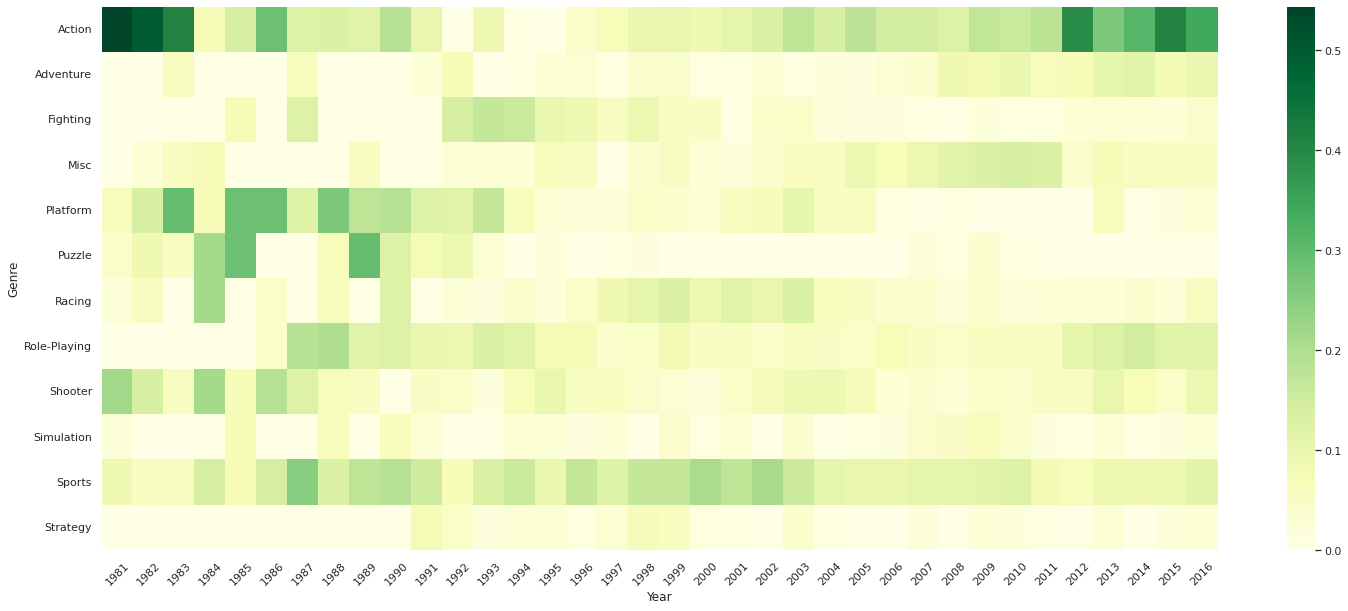

In [47]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(ct_df_scaled.loc['Action':'Strategy'],cmap="YlGn");
plt.xticks(rotation=45);

In [48]:
ct2_df = pd.crosstab(index = df['Year'], columns = df['Platform'])
ct2_df.columns

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [49]:
#Sum column for yearly total numbers of games.
ct2_df['Sum'] = len(ct2_df.index) * [0]
for i in ct_df.index:
  ct2_df.loc[i]['Sum'] = ct2_df.loc[i,'2600':'XOne'].sum()

In [ ]:
cols = ct2_df.T.columns 
index = ct2_df.T.index

mm_scaler = MinMaxScaler()
x_scaled = mm_scaler.fit_transform(ct2_df.T)
ct2_df_scaled = pd.DataFrame(x_scaled)
ct2_df_scaled.set_index(keys=index, inplace=True)
ct2_df_scaled.set_axis(axis=1, labels = cols, inplace=True)
ct2_df_scaled

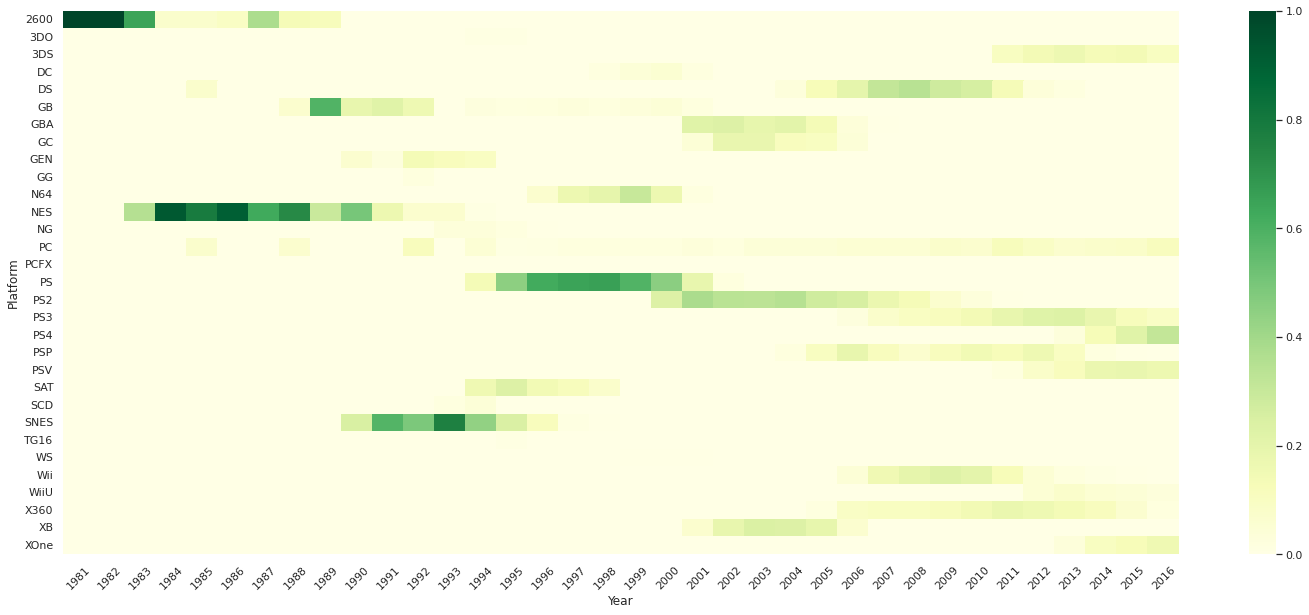

In [51]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.heatmap(ct2_df_scaled.loc['2600':'XOne'],cmap="YlGn");
plt.xticks(rotation=45);


---
# 출고량이 높은 게임에 대한 분석 및 시각화(Top100)


>* 플랫폼   
>* 장르 : Which genre game have the highest sale price globally?
>* 개발사 

---

In [68]:
top100 = df[df['Rank']<=100]

In [72]:
data_platform = top100.groupby(by=['Platform'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
# data_platform

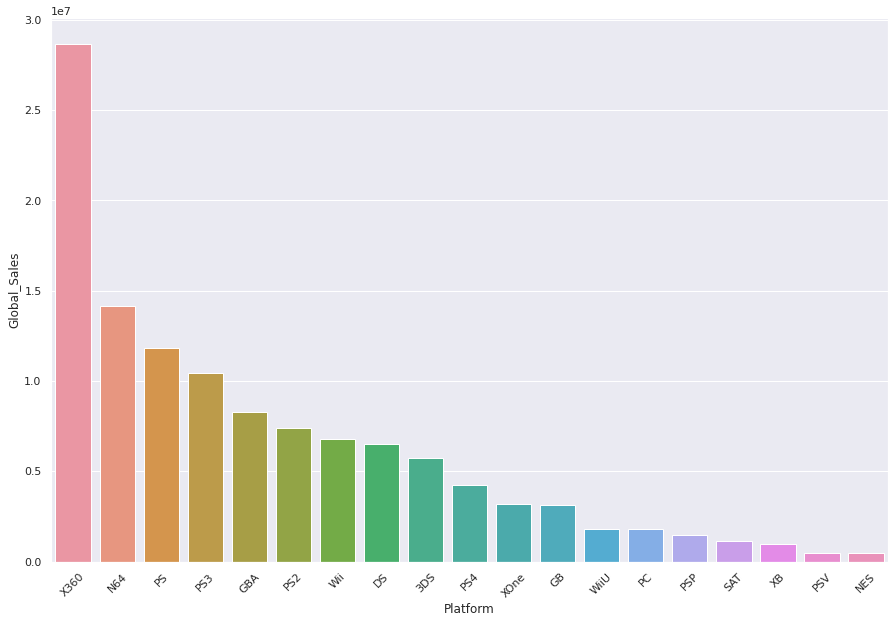

In [74]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Platform", y="Global_Sales", data=data_platform)
plt.xticks(rotation=45);

In [69]:
data_genre = top100.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
# data_genre

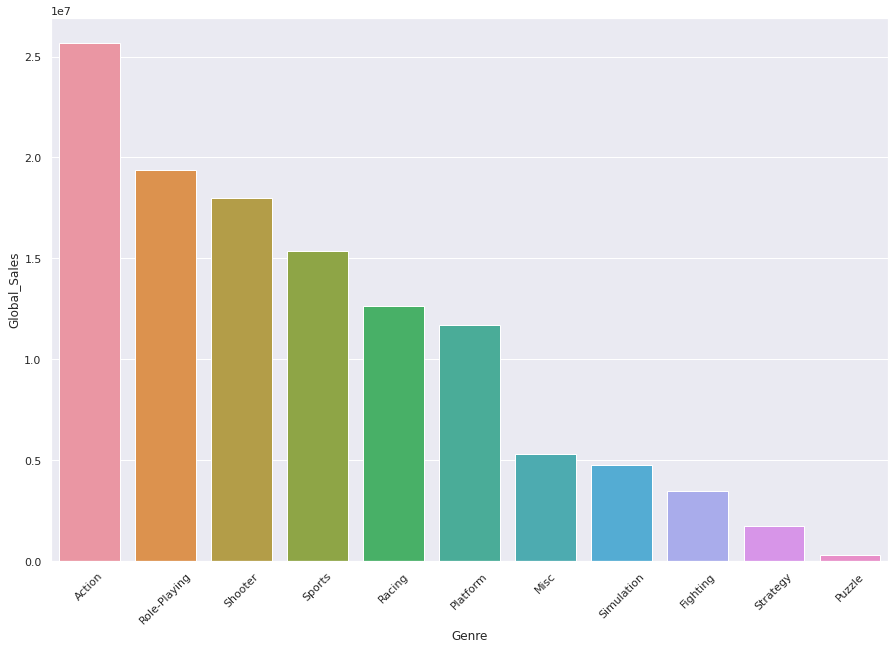

In [70]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_genre)
plt.xticks(rotation=45);

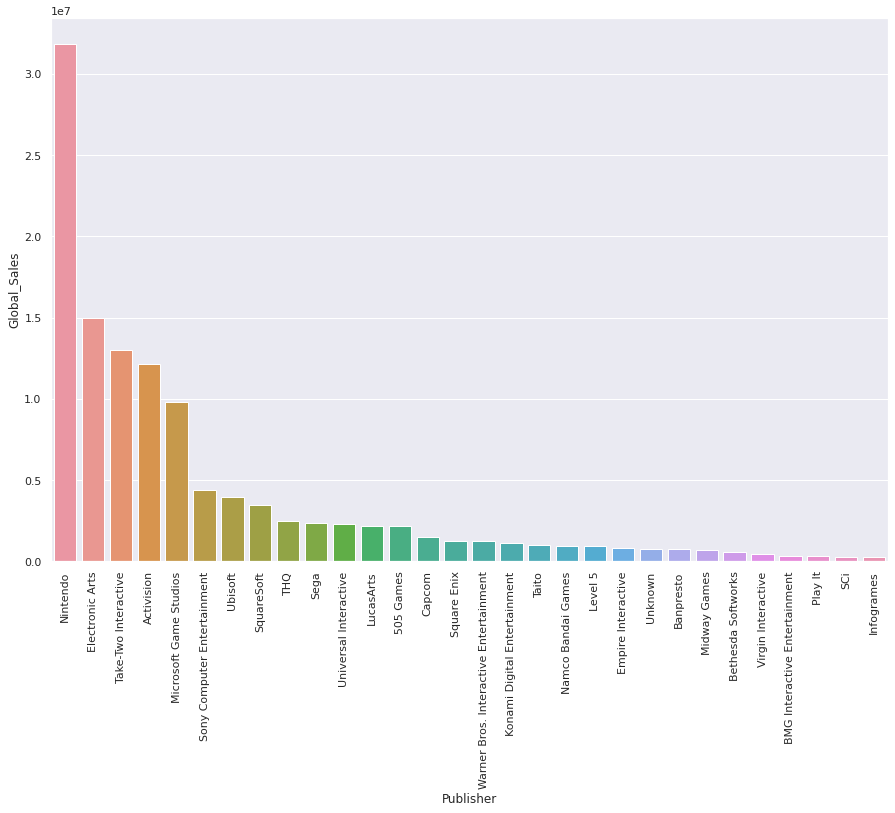

In [76]:
data_pub = top100.groupby(by=['Publisher'])['Global_Sales'].sum()
data_pub = data_pub.reset_index()
data_pub = data_pub.sort_values(by=['Global_Sales'], ascending=False)
# data_pub
plt.figure(figsize=(15, 10))
sns.barplot(x="Publisher", y="Global_Sales", data=data_pub)
plt.xticks(rotation=90);

# Global Market Share by Region

# 2006-2016 Analysis


> **Video-games by platform**

In [55]:
df_yr10 = df[df['Year']>=2006]

df10 = df_yr10.groupby('Platform')['Global_Sales'].sum().reset_index()
df10.sort_values(by='Global_Sales', ascending=False,inplace=True)
df10.reset_index(inplace=True,drop=True)

df10['Global_Share'] = np.round(100*df10['Global_Sales']/df10['Global_Sales'].sum()).astype(int)
others_share = df10.iloc[9:]['Global_Share'].sum() + 1 # 3% +1% for missing 1% by rounding
others_sales = df10.iloc[9:]['Global_Sales'].sum()

In [56]:
df10.loc[9,'Platform'] = 'Others'
df10.loc[9,'Global_Share'] = others_share
df10.loc[9,'Global_Sales'] = others_sales

df10 = df10.drop(labels = [10,11,12,13,14,15])
df10 = df10.sort_values(by='Global_Share', ascending=False)


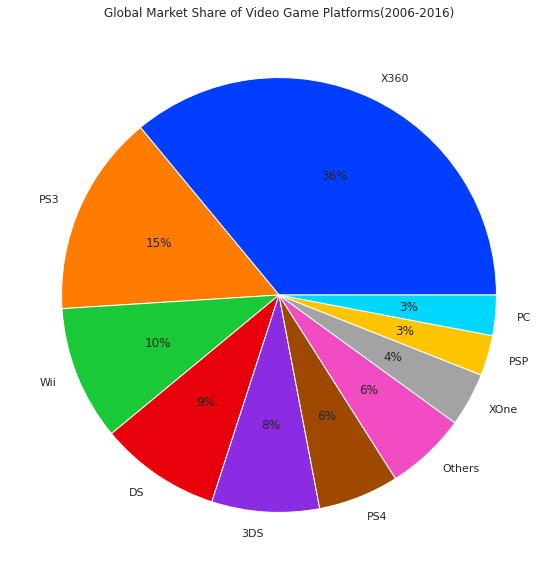

In [57]:
#sns.barplot(data=data1, x='Platform', y='Global_Sales')
dt = df10['Global_Share']
labels = df10['Platform']
colors = sns.color_palette('bright')[0:10]
plt.pie(dt, labels = labels, colors = colors, autopct='%.0f%%',radius = 1);
plt.title("Global Market Share of Video Game Platforms(2006-2016)")
plt.show()